In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Customer Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#there are some blank values in totalcharges so we replaced with 0 and change the datatype to float

In [5]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]= df["SeniorCitizen"].apply(conv)

#coverted the 0 annd 1 values of senior citizen with yes and no

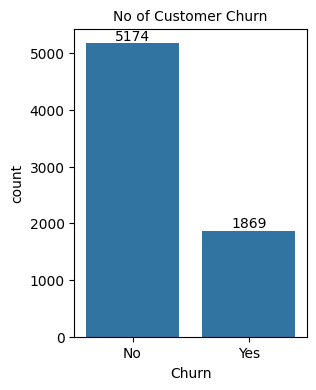

In [12]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data = df , x = "Churn")

ax.bar_label(ax.containers[0])
plt.title("No of Customer Churn",fontsize = 10)
plt.show()



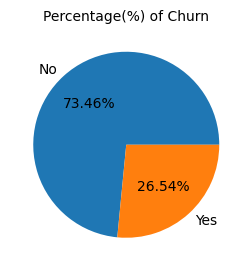

In [13]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage(%) of Churn",fontsize = 10)
plt.show()

* from the given pie chart we can conclude that 26.54% of our customer churned out

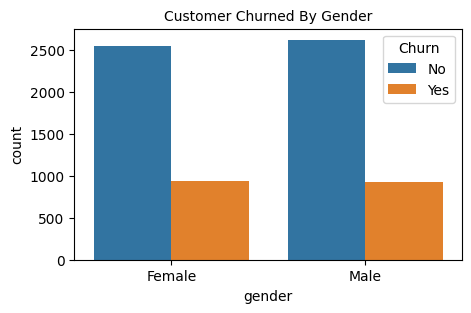

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(data = df , x = "gender", hue="Churn")
plt.title("Customer Churned By Gender", fontsize = 10)
plt.show()

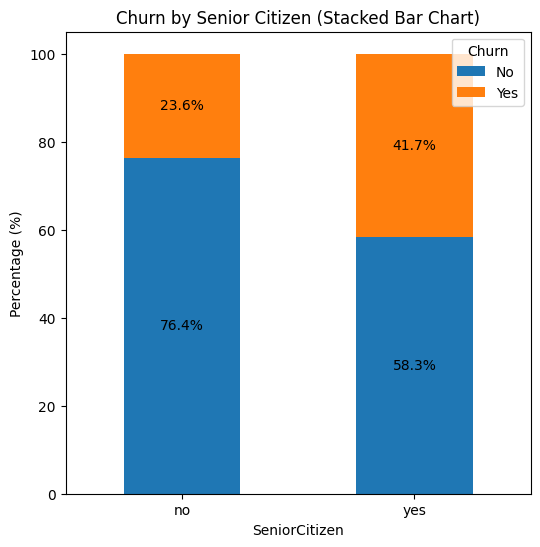

In [20]:
# Group the data by 'SeniorCitizen' and calculate churn percentages
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Set up the figure and axis with a specified size
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization

# Plot the bars with a stacked bar chart, using custom colors
total_counts.plot(kind='bar', stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Customize the chart labels and legend
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')  # Customize Legend Location

plt.show()


* Comparative a greater percentage of people in senior category have churned out 

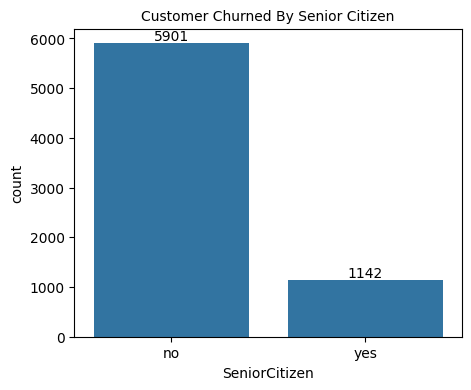

In [28]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data = df , x = "SeniorCitizen" )
ax.bar_label(ax.containers[0])
plt.title("Customer Churned By Senior Citizen", fontsize = 10)
plt.show()

*this needs to be fixed because the sinior cotizen data is not found

<function matplotlib.pyplot.show(close=None, block=None)>

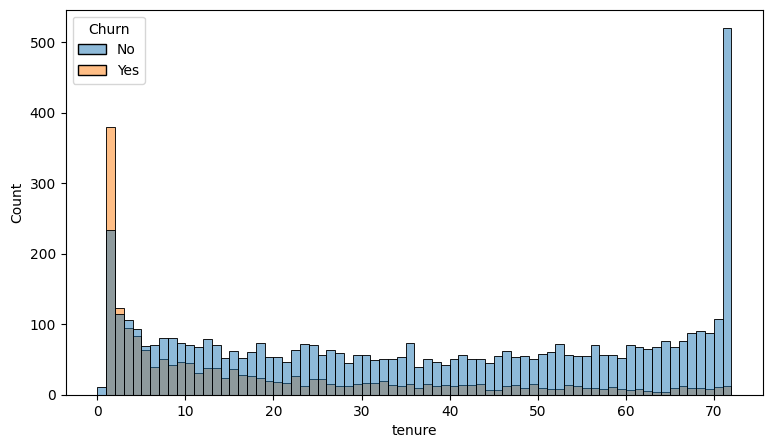

In [16]:
plt.figure(figsize =(9,5))
sns.histplot( data = df , x ="tenure",bins = 72 , hue = "Churn")
plt.show

* people who have used our servies for a long time have styed and people who have used our servies for short time have churned out

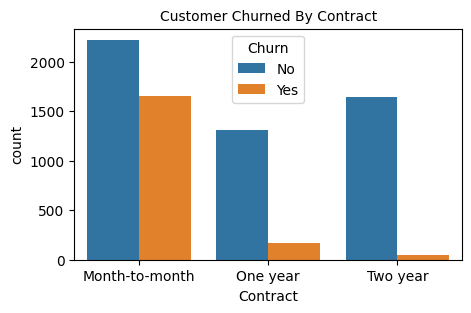

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data = df , x = "Contract", hue="Churn")
plt.title("Customer Churned By Contract", fontsize = 10)
plt.show()

* most of the customer who have churned is on monthly contract 
* we can covence them to take longer tenure contrcat 

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

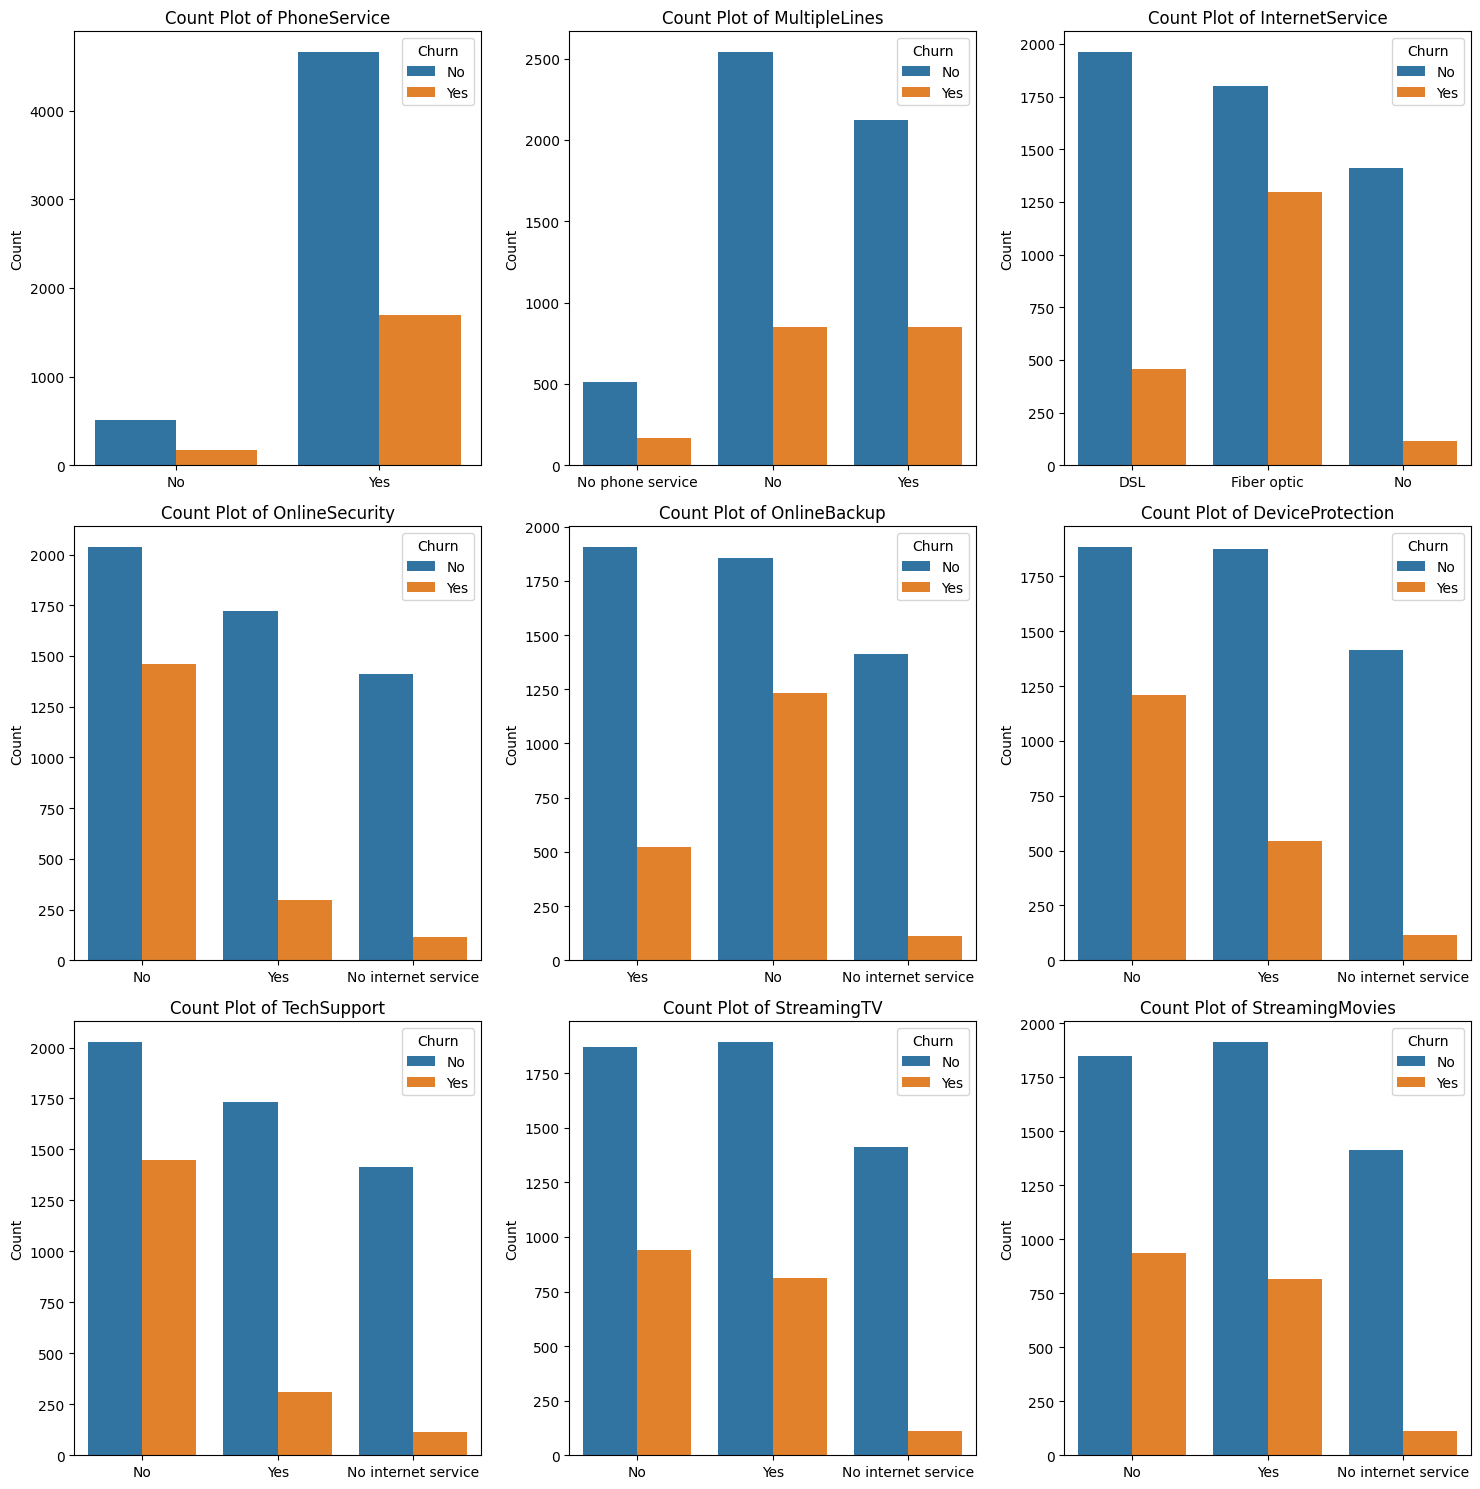

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for which we want to create count plots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the figure size and grid layout for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust rows and columns based on the number of columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])  # Create a count plot for each column
    axes[i].set_title(f'Count Plot of {col}')  # Set the title for each subplot
    axes[i].set_xlabel('')  # Optionally remove x-axis label for clarity
    axes[i].set_ylabel('Count')  # Set y-axis label

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


* The majority of customers who do not churn tend to havee servies like PhoneService, InternateService(Particularly,DSL) and OnilneSecurity enabled.For servies like OnlineBackup, TechSupport and StreamingTV, churn rate is noticeably higher when these servises not used or Unavilable.

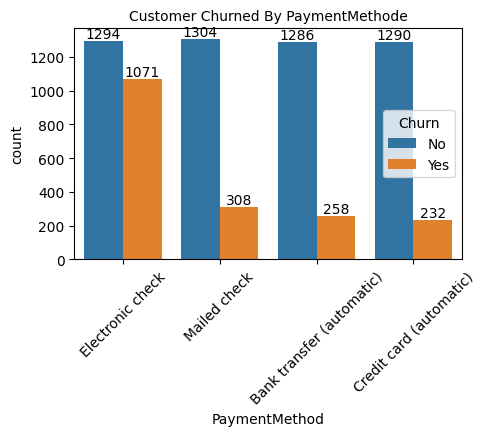

In [33]:
plt.figure(figsize=(5,3))
ax=sns.countplot(data = df , x = "PaymentMethod", hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churned By PaymentMethode", fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

* Customer more likely to churn when they are using electronic checks as payment methode